In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET

In [2]:
classList = {
    0:"aquarium",
    1:"bottle",
    2:"bowl",
    3:"box",
    4:"bucket",
    5:"plastic_bag",
    6:"plate",
    7:"styrofoam",
    8:"tire",
    9:"toilet",
    10:"tub",
    11:"washing_machine",
    12:"water_tower"
}

inv_classList = {v: k for k, v in classList.items()}
colNames = ['fileName', 'imgWidth', 'imgHeight', 'imgSize', 'objClass', 'objClassId', 'xmin', 'xmax', 'ymin', 'ymax', 'size', 'percentSize']

In [3]:
# df = pd.DataFrame(columns=colNames)
# ANNOTATION_PATH = '/home/warroom/robin_workspace/AIdea/dataset/train_cdc/train_annotations/'
# for file in os.listdir(ANNOTATION_PATH):
#     # For each file
#     tree = ET.ElementTree(file=ANNOTATION_PATH+file)
#     fileName = tree.find('filename').text
#     imgWidth = tree.find('size').find('width').text
#     imgHeight = tree.find('size').find('height').text
#     imgSize = int(imgWidth)*int(imgHeight)
#     # For each object
#     for obj in tree.findall('object'):
#         objClass = obj.find("name").text
#         objClassId = int(inv_classList[objClass])
#         xmin = int(obj.find('bndbox').find("xmin").text)
#         xmax = int(obj.find('bndbox').find("xmax").text)
#         ymin = int(obj.find('bndbox').find("ymin").text)
#         ymax = int(obj.find('bndbox').find("ymax").text)
#         size = (xmax-xmin)*(ymax-ymin)
#         percentSize = size/imgSize
#         tmp_df = pd.DataFrame([[fileName, imgWidth, imgHeight, imgSize, objClass, objClassId, xmin, xmax, ymin, ymax, size, percentSize]], columns=colNames)
#         df = pd.concat([df, tmp_df])

In [4]:
# df = df.reset_index(drop=True)
# df.to_csv('data.csv', index=False)

In [5]:
data = pd.read_csv("data.csv")

In [6]:
data

,fileName,imgWidth,imgHeight,imgSize,objClass,objClassId,xmin,xmax,ymin,ymax,size,percentSize
0,2017080420.jpg,300,400,120000,styrofoam,7,45,270,69,288,49275,0.410625
1,201208155.jpg,400,299,119600,tire,8,246,324,124,144,1560,0.013043
2,201208155.jpg,400,299,119600,tire,8,251,325,140,161,1554,0.012993
3,201208155.jpg,400,299,119600,tire,8,260,328,158,176,1224,0.010234
4,201208155.jpg,400,299,119600,tire,8,252,323,174,195,1491,0.012467
...,...,...,...,...,...,...,...,...,...,...,...,...
7930,201601052.jpg,400,300,120000,water_tower,12,97,135,1,29,1064,0.008867
7931,201601052.jpg,400,300,120000,water_tower,12,286,318,1,15,448,0.003733
7932,201601052.jpg,400,300,120000,plate,6,173,197,165,173,192,0.001600
7933,201406309.jpg,400,300,120000,bucket,4,111,216,73,209,14280,0.119000


In [7]:
# classSize = data.groupby('objClass')['fileName'].agg('count')
# classSizeList = [x for x in classSize]
# classData = pd.DataFrame([classSizeList], columns=inv_classList.keys())
# sns.set(font_scale=1.2)
# plt.figure(figsize=(10,10))
# p = sns.barplot(data=classData, orient='h')
# p.set_xlabel("Count",fontsize=15)
# p.set_ylabel("Classes",fontsize=15)

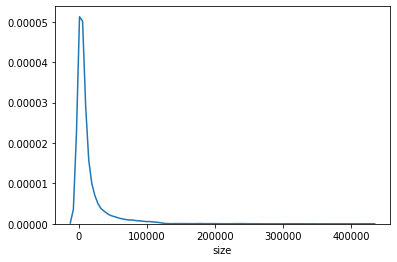

In [18]:
sns.distplot((data['size']), hist=False)

Text(0.5, 0, 'Percent Size log10')

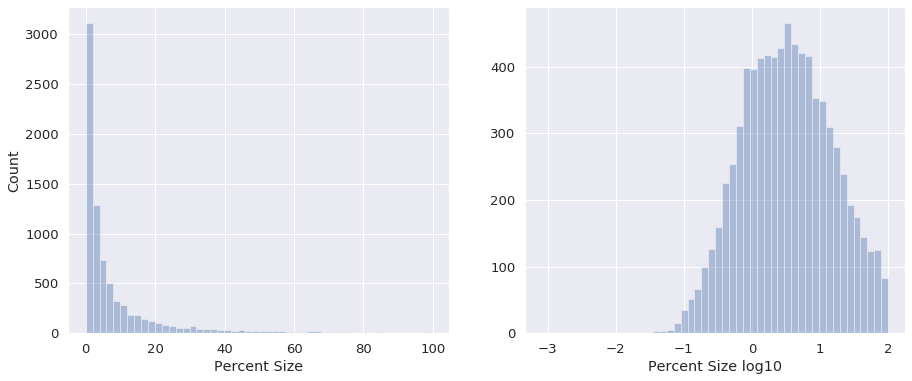

In [31]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.distplot(data['percentSize']*100, kde=False)
plt.xlabel('Percent Size')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.distplot(np.log10(data['percentSize']*100), kde=False)
plt.xlabel("Percent Size log10")